# Project Python Foundations: FoodHub Data Analysis

**Marks: 60**

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business. 

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

In [1]:
# Library to suppress warnings or deprecation notes 
import warnings
warnings.filterwarnings('ignore')

### Let us start by importing the required libraries

In [2]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns


### Understanding the structure of the data

In [3]:
## Reading a dataset from a csv file using pandas.
df = pd.read_csv('foodhub_order.csv')


In [4]:
# looking at head (5 observations) 
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


#### Observations:

* The DataFrame has 9 columns as mentioned in the Data Dictionary. 
* Data in each row corresponds to the order placed by a customer.
* restaurant_name contains name of the restaurants.
* cuisine_type contains different types of cuisines.
* cost_of_the_order contains cost of each orders.
* day_of_the_week says whether order is placed on week or weekends.
* rating provides the rating of each order.
* food_preparation_time is the time needed for preparing an order.
* delivery_time is the time needed for delivering an order.

In [5]:
# looking at tail (5 observations) 
df.tail()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
1893,1476701,292602,Chipotle Mexican Grill $1.99 Delivery,Mexican,22.31,Weekend,5,31,17
1894,1477421,397537,The Smile,American,12.18,Weekend,5,31,19
1895,1477819,35309,Blue Ribbon Sushi,Japanese,25.22,Weekday,Not given,31,24
1896,1477513,64151,Jack's Wife Freda,Mediterranean,12.18,Weekday,5,23,31
1897,1478056,120353,Blue Ribbon Sushi,Japanese,19.45,Weekend,Not given,28,24


### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [6]:
#df.shape returns the number of rows and columns of the dataframe
df.shape

(1898, 9)

#### Observations: 
*  The dataset has 1898 rows and 9 columns.


### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

In [7]:
# info() is used to print a concise summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations: 
* The datatypes of the different columns in the dataset are int(4nos), float(1 no), object(4 no).



### **Question 3:**  'restaurant_name', 'cuisine_type', 'day_of_the_week' are object type attributes. Convert them to 'category' type. Does this result in reduced memory usage? (Check the info() function) [1 mark]

In [8]:
#df.astype() function convert the data type of an existing column in a dataframe
# converts restaurant name from object to category
df.restaurant_name = df.restaurant_name.astype('category')

# Converts cuisine type from object to category
df.cuisine_type = df.cuisine_type.astype('category')

# Convert day of the week from object to category
df.day_of_the_week = df.day_of_the_week.astype('category')  

# df.info()function returns  information about the dataframe including the data types of each column and memory usage
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   order_id               1898 non-null   int64   
 1   customer_id            1898 non-null   int64   
 2   restaurant_name        1898 non-null   category
 3   cuisine_type           1898 non-null   category
 4   cost_of_the_order      1898 non-null   float64 
 5   day_of_the_week        1898 non-null   category
 6   rating                 1898 non-null   object  
 7   food_preparation_time  1898 non-null   int64   
 8   delivery_time          1898 non-null   int64   
dtypes: category(3), float64(1), int64(4), object(1)
memory usage: 102.7+ KB


#### Observations:
* Converting 'restaurant_name', 'cuisine_type', 'day_of_the_week' from object type attributes to  'category' type results in reduced memory usage. 
* Memory usage reduced from 133.6+ KB to 102.7+ KB.

### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [9]:
#df.describe function returns the statistical data like percentile, mean, etc of the datafram
df.describe()

,order_id,customer_id,cost_of_the_order,food_preparation_time,delivery_time
count,1.898000e+03,1898.000000,1898.000000,1898.000000,1898.000000
mean,1.477496e+06,171168.478398,16.498851,27.371970,24.161749
std,5.480497e+02,113698.139743,7.483812,4.632481,4.972637
min,1.476547e+06,1311.000000,4.470000,20.000000,15.000000
25%,1.477021e+06,77787.750000,12.080000,23.000000,20.000000
50%,1.477496e+06,128600.000000,14.140000,27.000000,25.000000
75%,1.477970e+06,270525.000000,22.297500,31.000000,28.000000
max,1.478444e+06,405334.000000,35.410000,35.000000,33.000000


#### Observations:
* Minimum food preperation time is 20 minutes.
* Average food preperation time is 27 minutes.
* Maximum food preperation time is 35 minutes.


### **Question 5:** How many orders are not rated? [1 mark]

In [10]:
#The df.value_counts( )returns a Series containing the counts of unique values
df['rating'].value_counts()  

Not given    736
5            588
4            386
3            188
Name: rating, dtype: int64

#### Observations:
* 736 orders are not rated.

### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

In [11]:
# While doing uni-variate analysis of numerical variables we want to study their central tendency 
# and dispersion.
# Let us write a function that will help us create a boxplot and histogram for any input numerical 
# variable.
# This function takes the numerical column as the input and returns the boxplots 
# and histograms for the variable.
# Let us see if this helps us write faster and cleaner code.    
    
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},#says first graph box plot is narrow .25.
    #box plot gioves outliers info
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram , we need to define bins.
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

## Observations on Cost of Order

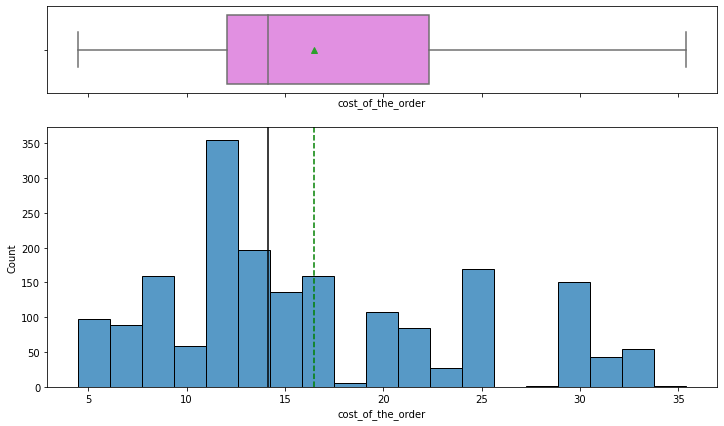

In [12]:
#histogram for cost of order.
#the data is numeric 
#no outliers
histogram_boxplot(df, 'cost_of_the_order')

#### Observations:
* Mean is around 16 and median around 14.
* Cost of order does not have any outliers
* Mean is higher than median

## Observations on Food Preperation Time

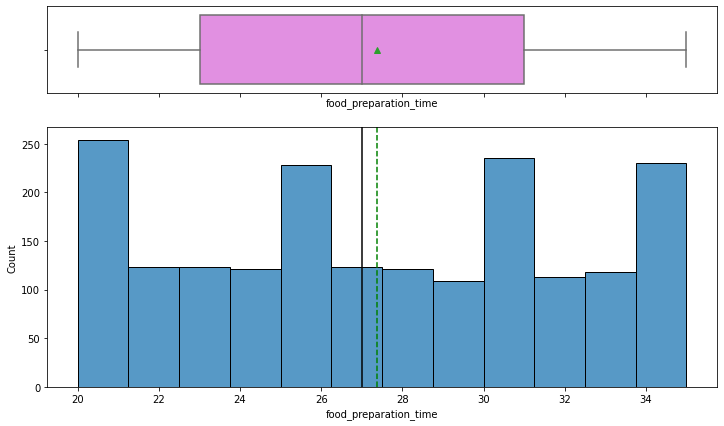

In [13]:
#histogram for Food Preperation Time.
#the data is numeric 
histogram_boxplot(df, 'food_preparation_time')

#### Observations:
* For food preperation time, mean is around 27 and median is 27
* Preperation time does not have any outliers.
* Mean is higher than median

## Observations on Delivery time

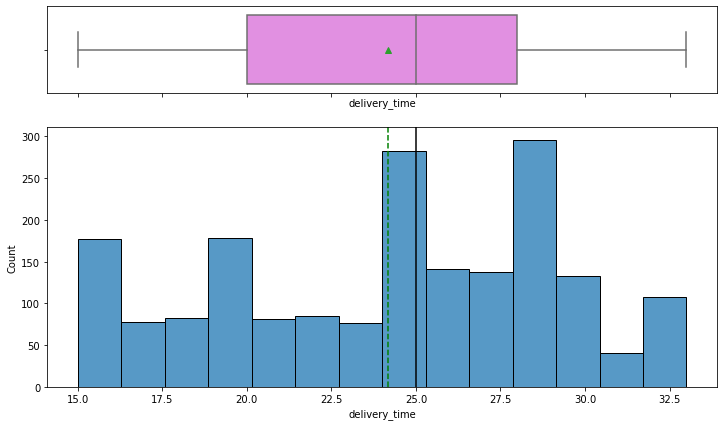

In [14]:
#histogram for Delivery time.
#the data is numeric 
histogram_boxplot(df, 'delivery_time')

#### Observations:
* Median delivery time is 25 and Mean is around 24
* Delivery time does not have any outliers.
* Median is higher than mean.

## Observations on Cuisine type

In [15]:
# Check unique cuisine type
df['cuisine_type'].value_counts()

American          584
Japanese          470
Italian           298
Chinese           215
Mexican            77
Indian             73
Middle Eastern     49
Mediterranean      46
Thai               19
French             18
Southern           17
Korean             13
Spanish            12
Vietnamese          7
Name: cuisine_type, dtype: int64

#### Observations:
* Most popular cuisine is American (584)
* Second most popular is Japanese (470)
* Third most popular is Italian (298)
* Fourth most popular is Italian (215)
* Fifth most popular is Mexican (77)

#### Observations:
* Most popular cuisine is American 
* Second most popular is Japanese
* Third most popular is Italian
* Fourth most popular is Chinese
* Fifth most popular is Mexican

## Observations on rating

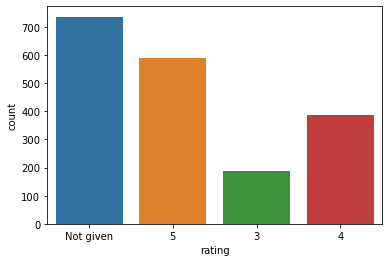

In [16]:
sns.countplot(data = df, x ='rating');

#### Observations:
* Lot of orders are not rated.
* Among the rated orders most ratings are 5.
* Rating not given is around 730
* No of orders with 5 rate is around 580
* No of orders with 4 rate is around 380
* No of orders with 3 rate is 180


## Observations on days of the week

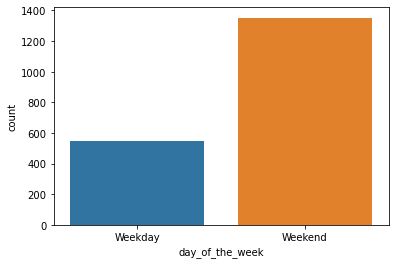

In [17]:

sns.countplot(data=df,x='day_of_the_week');


#### Observations:
*  There is more orders on weekends.
*  No of orders on weekend is more than weekdays.
*  No of orders on weekday is around 550
*  No of order on weekend is around  1350

### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

In [18]:
#Restaurant names will be displayed from highest to lowest
df['restaurant_name'].value_counts() 

Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
                            ... 
Klong                          1
Kambi Ramen House              1
Il Bambino                     1
Hunan Manor                    1
Lamarca Pasta                  1
Name: restaurant_name, Length: 178, dtype: int64

**Observation:** Top 5 restaurants with highest number of orders are 
* Shake Shack (219)
* The Meatball Shop(132)
* Blue Ribbon Sushi(119)
* Blue Ribbon Fried Chicken(96)
* Parm (68)


### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

In [19]:
# shortlist the cuisine on weekend 
df_weekend = df[df['day_of_the_week'] == 'Weekend']
# cuisine are arranged with popularity(top most one on the top of the list).
df_weekend['cuisine_type'].value_counts() 

American          415
Japanese          335
Italian           207
Chinese           163
Mexican            53
Indian             49
Mediterranean      32
Middle Eastern     32
Thai               15
French             13
Korean             11
Southern           11
Spanish            11
Vietnamese          4
Name: cuisine_type, dtype: int64

In [20]:
# shortlist the cuisine on weekend 
df_week = df[df['day_of_the_week'] == 'Weekday']
# cuisine are arranged with popularity(top most one on the top of the list).
df_week['cuisine_type'].value_counts() 

American          169
Japanese          135
Italian            91
Chinese            52
Indian             24
Mexican            24
Middle Eastern     17
Mediterranean      14
Southern            6
French              5
Thai                4
Vietnamese          3
Korean              2
Spanish             1
Name: cuisine_type, dtype: int64

**Observation:** 
* Most popular cuisine on weekends is American.

### **Question 9**: What percentage of the orders cost more than 20 dollars? [2 marks]

In [21]:
# To find orders that cost more than 20 dollar 
df_more_than_20 = df[df['cost_of_the_order']>20] 

# To find in percentage
percentage = (df_more_than_20.shape[0] / df.shape[0]) * 100

# print the result 
print("Percentage of the orders that cost more than 20 dollars is", round(percentage, 2), '%')

Percentage of the orders that cost more than 20 dollars is 29.24 %


#### Observations:
* Percentage of the orders that cost more than 20 dollars is 29.24 %

### **Question 10**: What is the mean order delivery time? [1 mark]

In [22]:
# find the mean oder delivery time
mean_order_delivery_time = df['delivery_time'].mean()  

# print the result 
print('The mean order delivery time is',round(mean_order_delivery_time,2),'minutes' )


The mean order delivery time is 24.16 minutes


#### Observations: 
* The mean order delivery time is 24.16 minutes

### **Question 11:** The company has decided to give 20% discount vouchers to the top 5 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [23]:
# count.head will give the top 5 most frequent customers
df['customer_id'].value_counts().head()  

52832     13
47440     10
83287      9
250494     8
65009      7
Name: customer_id, dtype: int64

#### Observations:
The IDs of the top 5 most frequent customers and their number of orders they placed are 
*  52832 (13)
*  47440 (10)
*  83287 (9)
*  250494(8)
*  65009 (7)

### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]


### Observations on Cost of order vs Rating. 

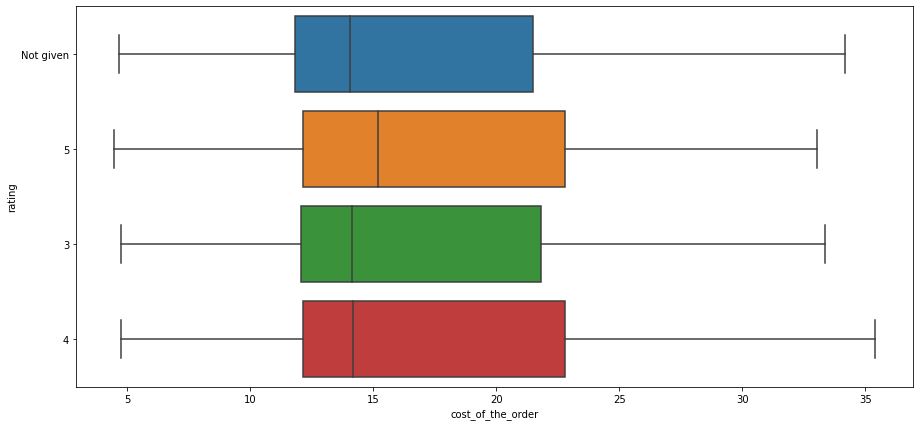

In [24]:
plt.figure(figsize=(15,7))
sns.boxplot( data =df  , x = 'cost_of_the_order', y = 'rating' )
#The data is numeric and we want to compare distributions across different categorical variables
plt.show()

#### Observations:
* Most of the orders with 5 rating cost between 16 and 22 dollars
* Most of the orders with 4 rating also cost between 12 and 22 dollars
* Most of the orders with 3 rating cost between 12 and 22 dollars
* Most of the orders with 5 rating cost between 12 and 22 dollars




### Observations on Food preperation time vs Rating. 

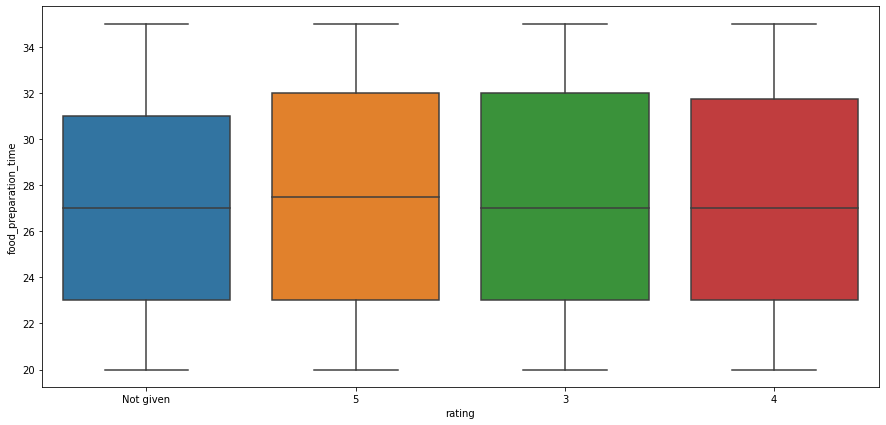

In [25]:
plt.figure(figsize=(15,7))
sns.boxplot( data =df  , x = 'rating', y = 'food_preparation_time' )
plt.show()

#### Observations:
* Most of the rated orders took 23 to 31 minutes to prepare.

### Observations on Delivery time vs Rating. 

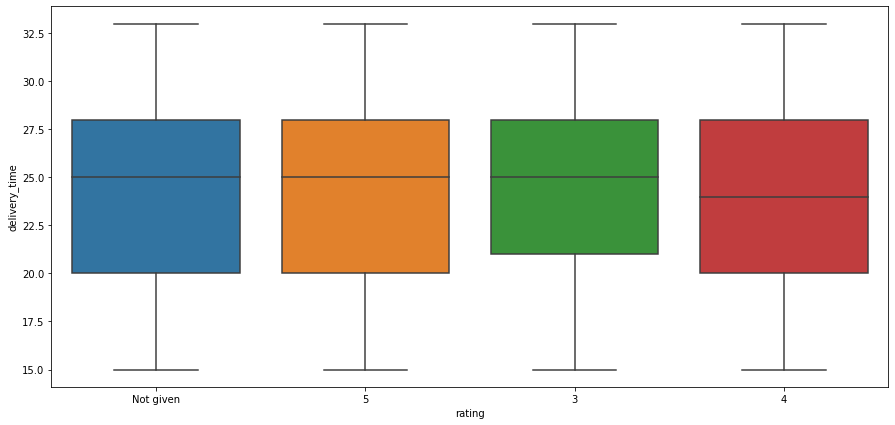

In [26]:
plt.figure(figsize=(15,7))
sns.boxplot( data =df  , x = 'rating', y = 'delivery_time' )
plt.show()

#### Observations:
* Most of the rated orders took 20 to 28 minutes to deliver.

## Correlation

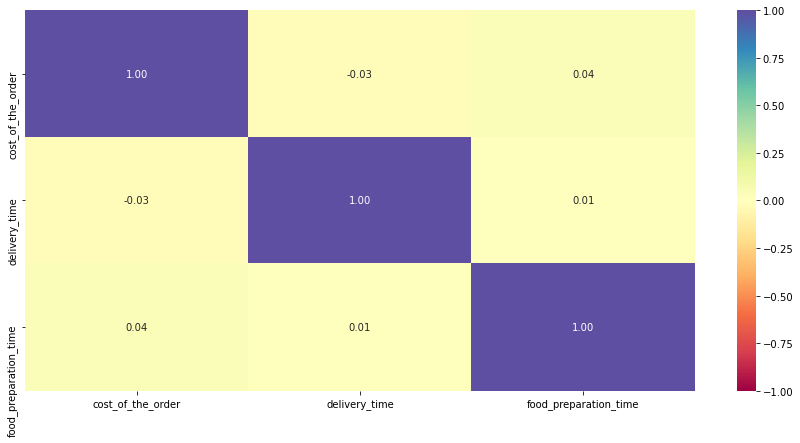

In [27]:
# Check for correlation among numerical variables
num_var = ['cost_of_the_order','delivery_time','food_preparation_time']

corr = df[num_var].corr()

# plot the heatmap

plt.figure(figsize=(15, 7))
sns.heatmap(corr, annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral", xticklabels=corr.columns, yticklabels=corr.columns)
plt.show()

**Observations**
* Cost of order is negatively correlated with delivery time. 
* There does not seem to be a strong relationship between delivery time and food preperation time.
* There does not seem to be a strong relationship between cost of order and food preperation time.

### Bivariate Scatter Plots

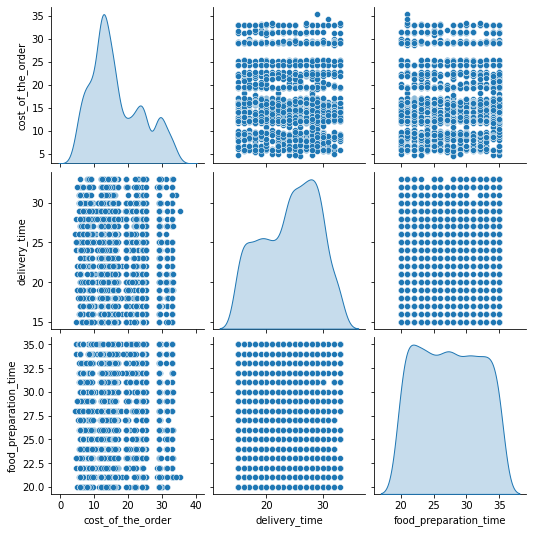

In [28]:

sns.pairplot(data=df[num_var], diag_kind="kde")
plt.show()


**Observations**
* We get the same insights as from the correlation plot
* There does not seem to be a strong relationship between delivery time and food preperation time.
* There does not seem to be a strong relationship between cost of order and food preperation time.

### Relationship between cuisine type and delivery time

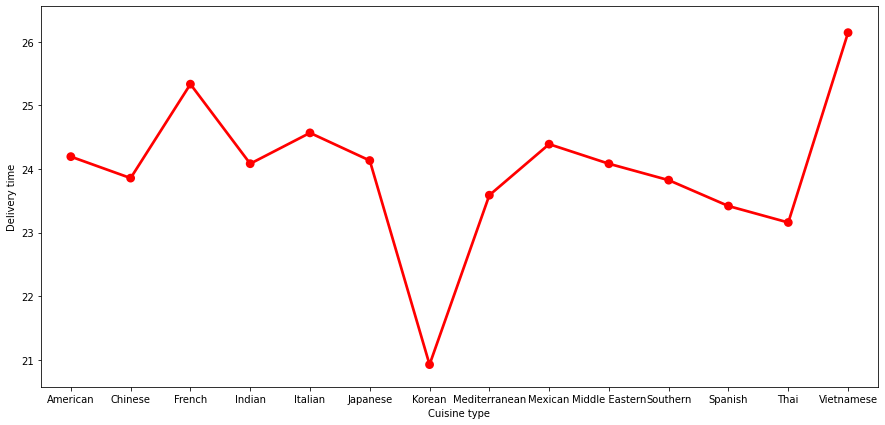

In [29]:
plt.figure(figsize=(15,7))
sns.pointplot(x="cuisine_type", y="delivery_time",ci=0,data=df,color="RED")
plt.ylabel('Delivery time')
plt.xlabel('Cuisine type')
plt.show()

**Observations**
* Korean cuisine takes less time to deliver



### Relationship between cuisine type and food preperation time

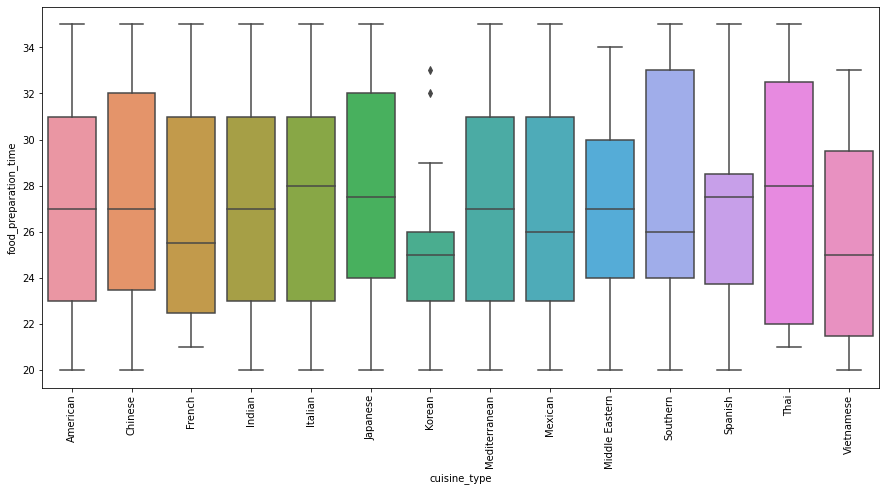

In [30]:
plt.figure(figsize=(15,7))
sns.boxplot( data =df  , x = 'cuisine_type', y = 'food_preparation_time' )
plt.xticks(rotation=90) # To rotate the x axis lables
plt.show()

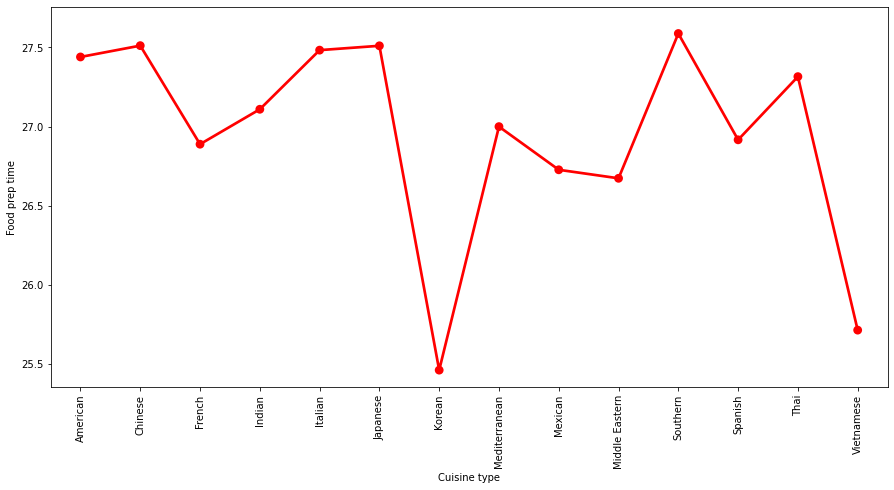

In [31]:
plt.figure(figsize=(15,7))
sns.pointplot(x="cuisine_type", y="food_preparation_time",ci=0,data=df,color="RED")
plt.ylabel('Food prep time')
plt.xlabel('Cuisine type')
plt.xticks(rotation=90)
plt.show()

**Observations**
* Chines, japanese and southern takes more food preperation time

### Relationship between days of the week and food preperation time

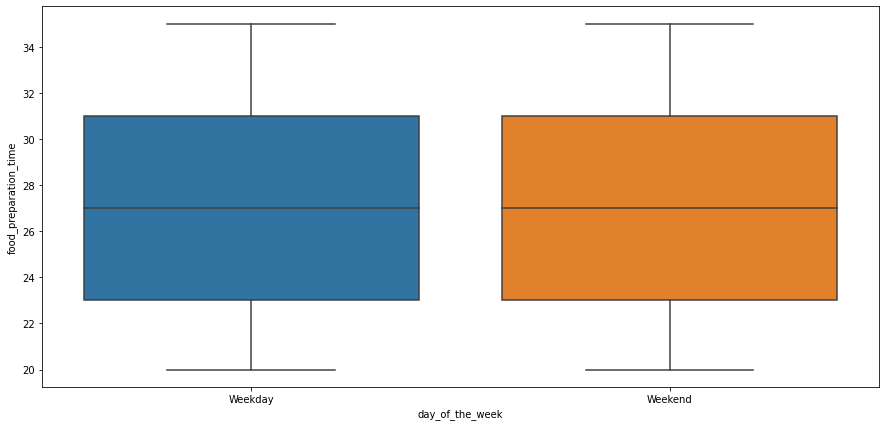

In [32]:
plt.figure(figsize=(15,7))
sns.boxplot( data =df  , x = 'day_of_the_week', y = 'food_preparation_time' )
plt.show()

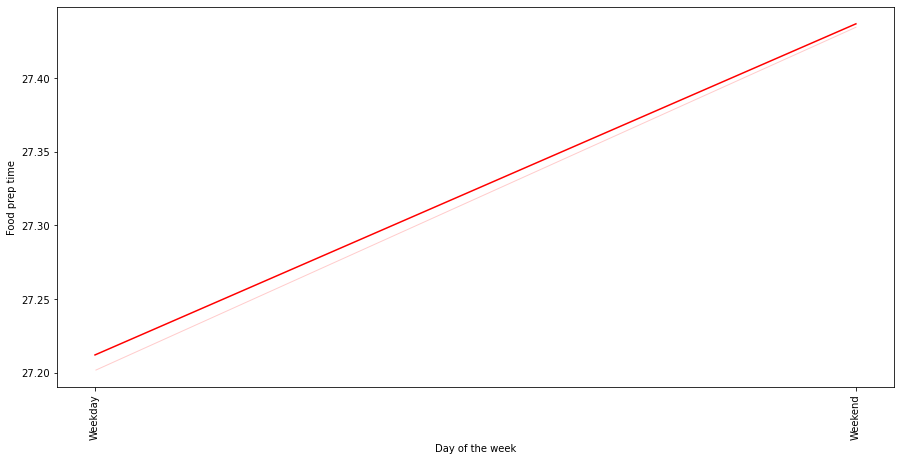

In [33]:
plt.figure(figsize=(15,7))
sns.lineplot(x="day_of_the_week", y="food_preparation_time",ci=0,data=df,color="RED")
plt.ylabel('Food prep time')
plt.xlabel('Day of the week')
plt.xticks(rotation=90)
plt.show()


**Observations**
* Food preperation time is more on weekends.

### Relationship between cuisine type and cost of order

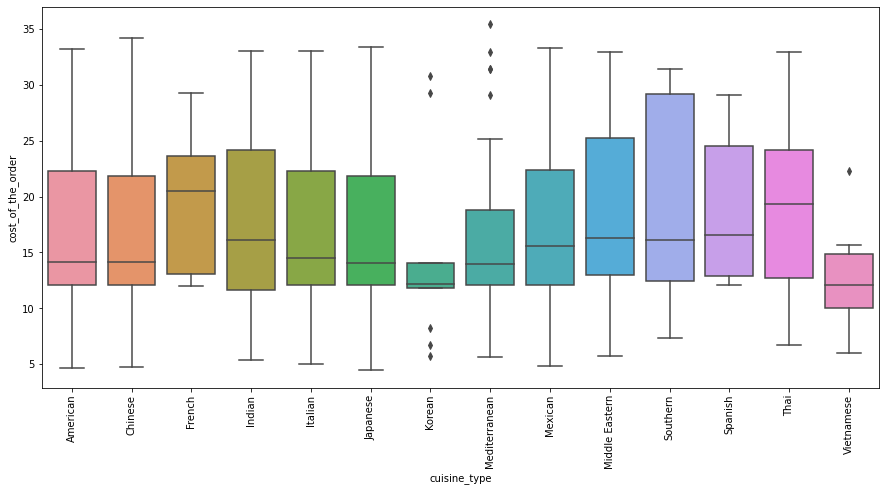

In [34]:
plt.figure(figsize=(15,7))
sns.boxplot( data =df  , x = 'cuisine_type', y = 'cost_of_the_order' )
plt.xticks(rotation=90) # To rotate the x axis lables
plt.show()

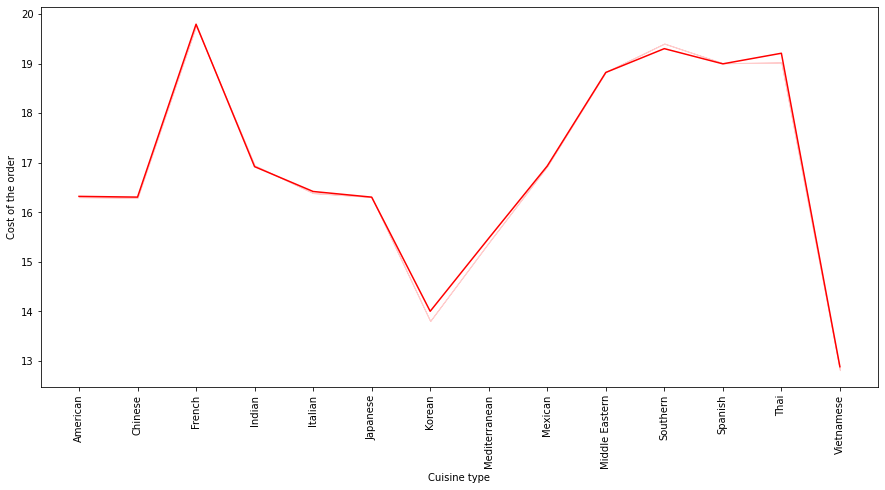

In [35]:
plt.figure(figsize=(15,7))
sns.lineplot(x="cuisine_type",y="cost_of_the_order",ci=0,data=df,color="RED")
plt.ylabel('Cost of the order')
plt.xlabel('Cuisine type')
plt.xticks(rotation=90)
plt.show()


**Observations**
* Cost of order is more on southern

### Relationship between days of week  and delivery time

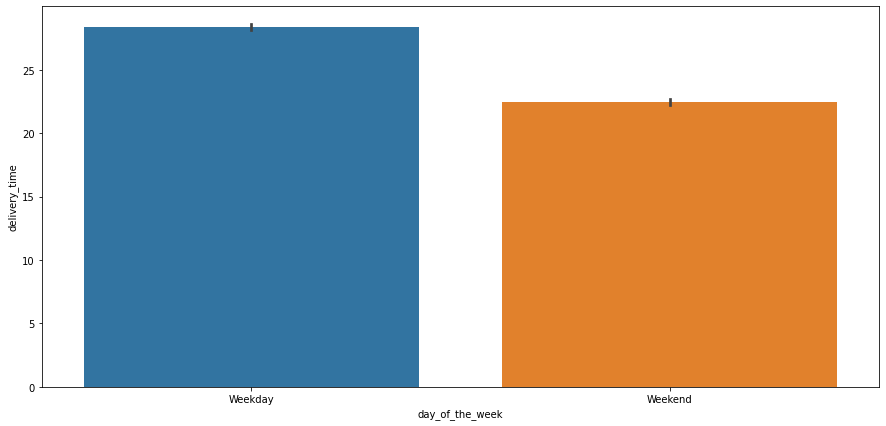

In [36]:
plt.figure(figsize=(15,7))
sns.barplot( data =df  , x = 'day_of_the_week', y = 'delivery_time' )
plt.show()

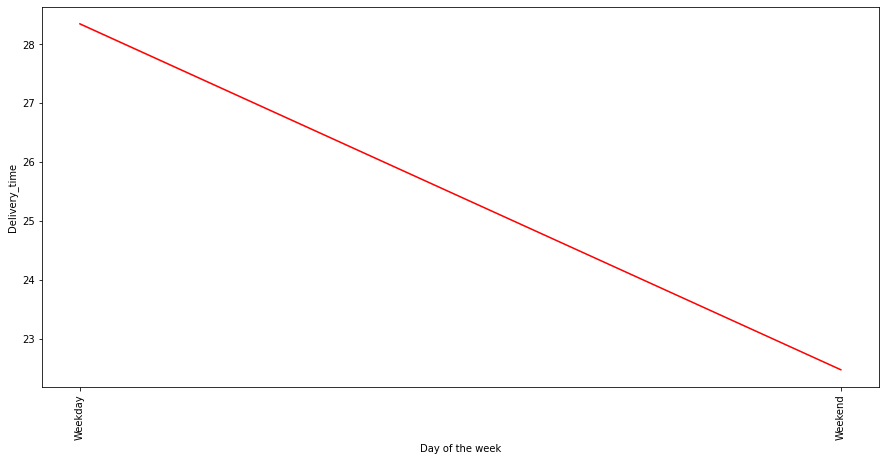

In [37]:
plt.figure(figsize=(15,7))
sns.lineplot(x="day_of_the_week",y='delivery_time',ci=0,data=df,color="RED")
plt.ylabel('Delivery_time')
plt.xlabel('Day of the week')
plt.xticks(rotation=90)
plt.show()

**Observations**
* Delivery time is more on week days

### Relationship between days of week  and cost of order

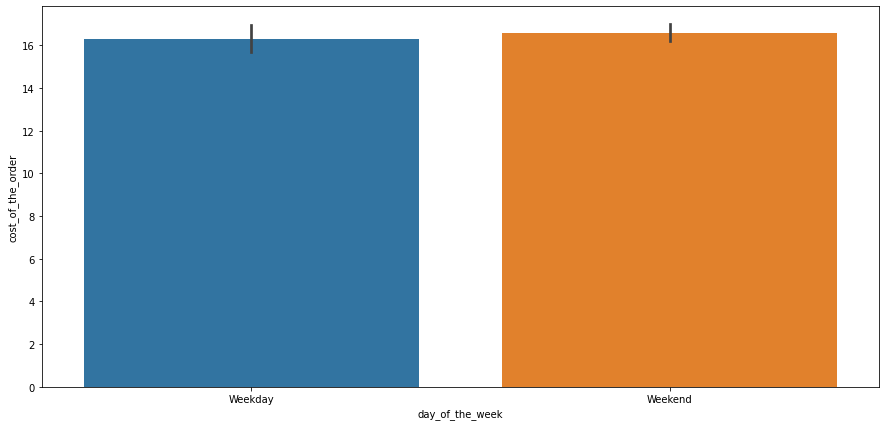

In [38]:
plt.figure(figsize=(15,7))
sns.barplot( data =df  , x = 'day_of_the_week', y = 'cost_of_the_order' )
plt.show()

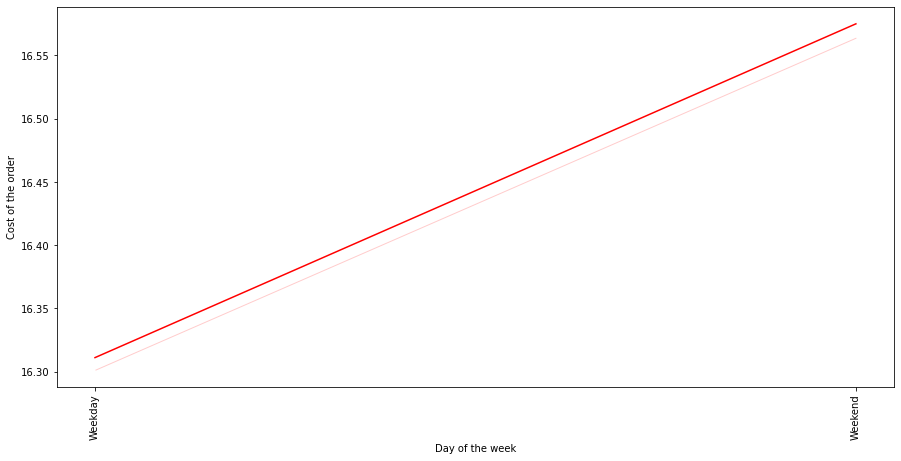

In [39]:
plt.figure(figsize=(15,7))
sns.lineplot(x="day_of_the_week",y="cost_of_the_order",ci=0,data=df,color="RED")
plt.ylabel('Cost of the order')
plt.xlabel('Day of the week')
plt.xticks(rotation=90)
plt.show()

**Observations**
* Cost of order is more on weekend.

### Relationship between days of week  and food preperation time

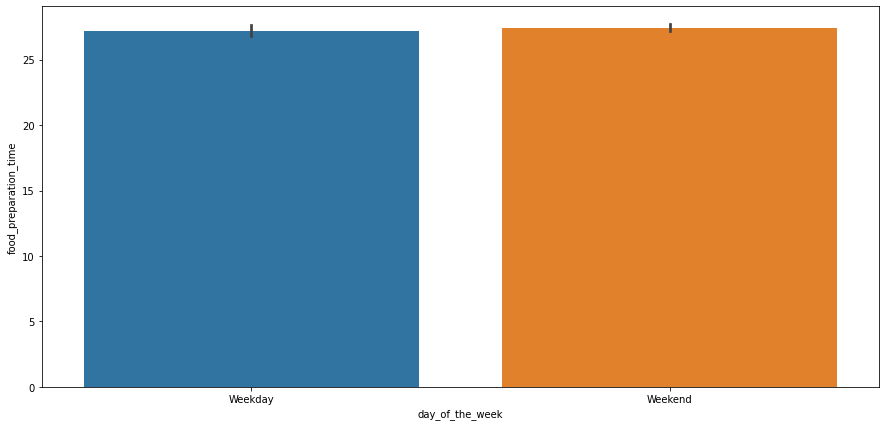

In [40]:
plt.figure(figsize=(15,7))
sns.barplot( data =df  , x = 'day_of_the_week', y = 'food_preparation_time' )
plt.show()

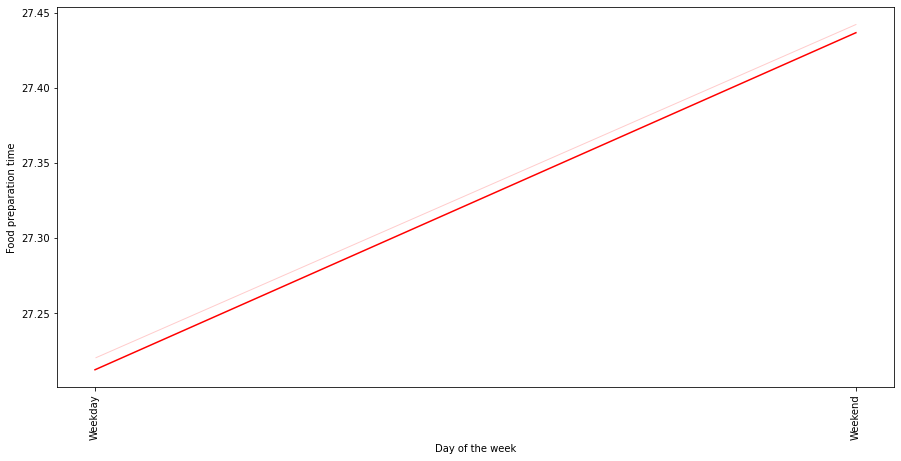

In [41]:
plt.figure(figsize=(15,7))
sns.lineplot(x="day_of_the_week",y="food_preparation_time",ci=0,data=df,color="RED")
plt.ylabel('Food preparation time')
plt.xlabel('Day of the week')
plt.xticks(rotation=90)
plt.show()

**Observations**
* Food preperation time is more on weekend.

### Relationship between Restaurant name and cost of order.

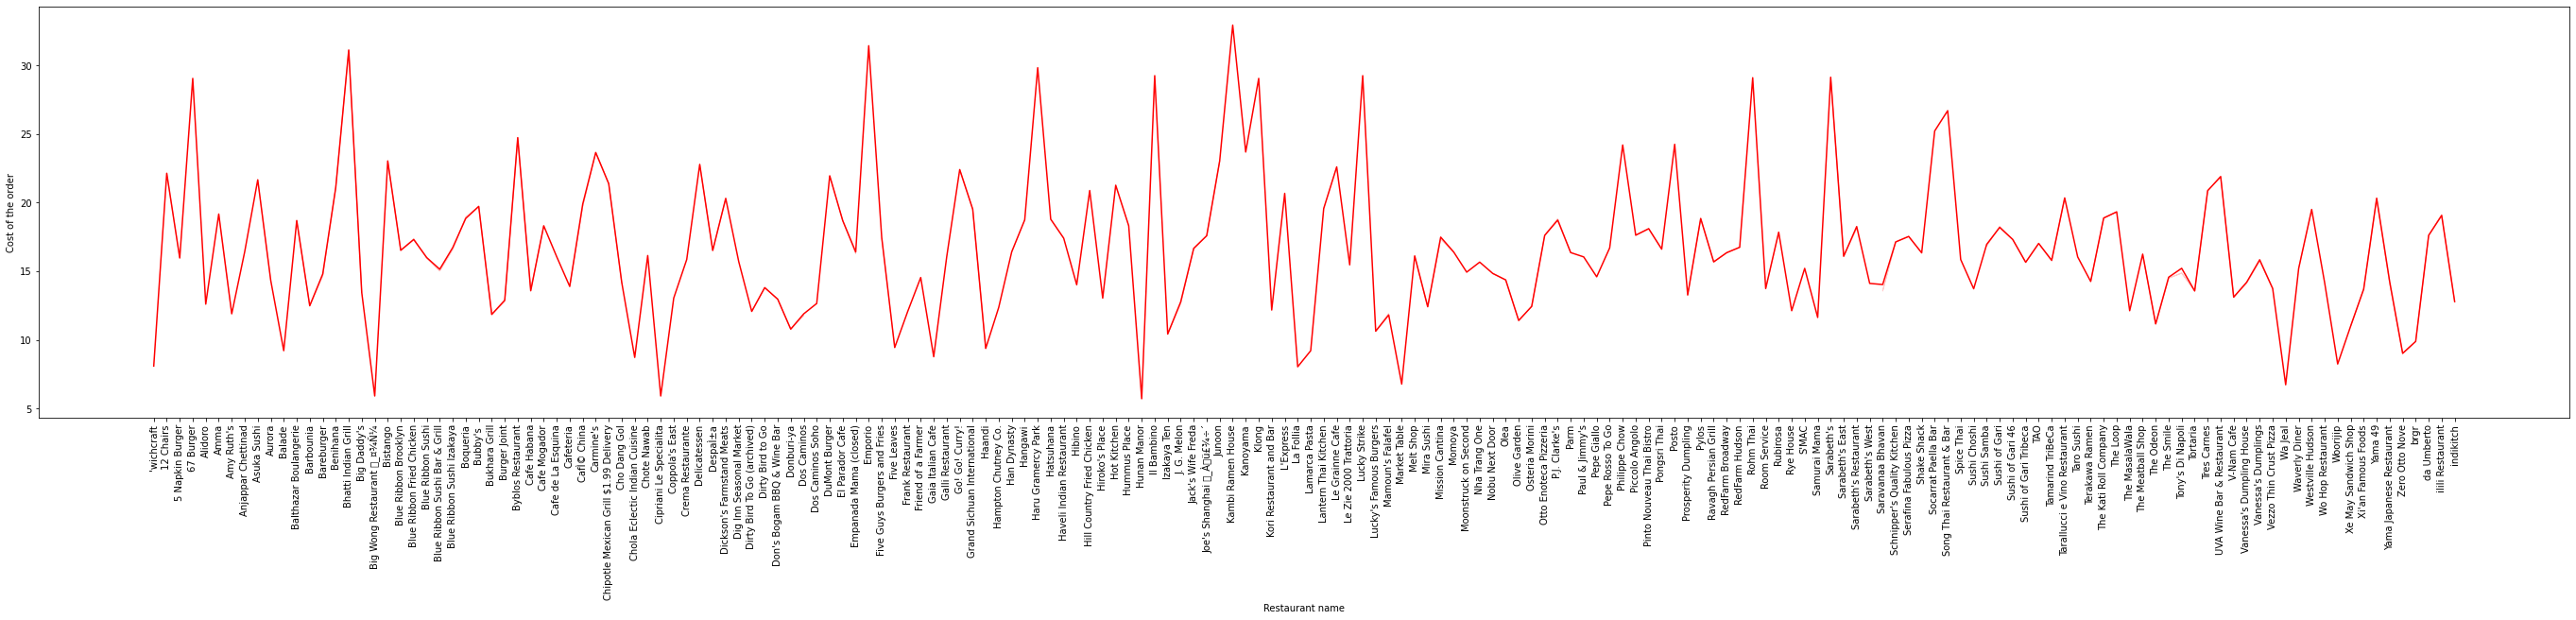

In [42]:
plt.figure(figsize=(48,8))
sns.lineplot(x = 'restaurant_name', y = 'cost_of_the_order',ci=0,data=df,color="RED")
plt.ylabel('Cost of the order')
plt.xlabel('Restaurant name')
plt.xticks(rotation=90)
plt.show()

**Observations**
* Cost of orders in most restaurants are between 10 and 25

### Relationship between Restaurant name and cost of order.

In [43]:
df.groupby(['restaurant_name'])['cost_of_the_order'].sum().sort_values(ascending = False).head()

restaurant_name
Shake Shack                  3579.53
The Meatball Shop            2145.21
Blue Ribbon Sushi            1903.95
Blue Ribbon Fried Chicken    1662.29
Parm                         1112.76
Name: cost_of_the_order, dtype: float64

**Observations**
* Sum of cost of order is higher in shake shack.

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

In [44]:
#information about the rating can be seen here.
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   order_id               1898 non-null   int64   
 1   customer_id            1898 non-null   int64   
 2   restaurant_name        1898 non-null   category
 3   cuisine_type           1898 non-null   category
 4   cost_of_the_order      1898 non-null   float64 
 5   day_of_the_week        1898 non-null   category
 6   rating                 1898 non-null   object  
 7   food_preparation_time  1898 non-null   int64   
 8   delivery_time          1898 non-null   int64   
dtypes: category(3), float64(1), int64(4), object(1)
memory usage: 102.7+ KB


#### Observations:
* Rating is object category

In [45]:
#Remove "Not given" from the rating.
df_rated = df[df['rating'] != 'Not given'].copy()
df_rated

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24
5,1477224,147468,Tamarind TriBeCa,Indian,25.22,Weekday,3,20,24
7,1477859,89574,Barbounia,Mediterranean,5.97,Weekday,3,33,30
...,...,...,...,...,...,...,...,...,...
1889,1478190,94152,RedFarm Broadway,Chinese,8.68,Weekday,3,33,30
1890,1477316,164776,TAO,Japanese,15.67,Weekend,5,20,22
1893,1476701,292602,Chipotle Mexican Grill $1.99 Delivery,Mexican,22.31,Weekend,5,31,17
1894,1477421,397537,The Smile,American,12.18,Weekend,5,31,19


In [46]:
#convert rating to int
df_rated['rating'] = df_rated['rating'].astype('int') 
df_rated.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1162 entries, 2 to 1896
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   order_id               1162 non-null   int64   
 1   customer_id            1162 non-null   int64   
 2   restaurant_name        1162 non-null   category
 3   cuisine_type           1162 non-null   category
 4   cost_of_the_order      1162 non-null   float64 
 5   day_of_the_week        1162 non-null   category
 6   rating                 1162 non-null   int64   
 7   food_preparation_time  1162 non-null   int64   
 8   delivery_time          1162 non-null   int64   
dtypes: category(3), float64(1), int64(5)
memory usage: 74.3 KB


#### Observations:
* Rating is now int category

In [47]:
# group by restaurant name
# sort on ascending order to find the highest rated
df_rating_count = df_rated.groupby(['restaurant_name'])['rating'].count().sort_values(ascending = False).reset_index()
df_rating_count



,restaurant_name,rating
0,Shake Shack,133
1,The Meatball Shop,84
2,Blue Ribbon Sushi,73
3,Blue Ribbon Fried Chicken,64
4,RedFarm Broadway,41
...,...,...
173,Market Table,0
174,Paul & Jimmy's,0
175,Room Service,0
176,Rohm Thai,0


#### Observations:
* Restaurant names are sorted from highest rated to lowest

In [48]:
# 5 top rated restaurants list
df_rating_count.head()

,restaurant_name,rating
0,Shake Shack,133
1,The Meatball Shop,84
2,Blue Ribbon Sushi,73
3,Blue Ribbon Fried Chicken,64
4,RedFarm Broadway,41


#### Observations: 
##### Restaurants that fulfill the criteria to get the promotional offer are 
* Shake Shack
* The Meatball Shop
* Blue Ribbon Sushi
* Blue Ribbon Fried Chicken

In [49]:
new_df_ratings = df[df['rating'] != 'Not given'].copy()
new_df_ratings

new_df_ratings['rating'] = new_df_ratings['rating'].astype('int')
new_df_ratings_count = new_df_ratings.groupby(['restaurant_name'])['rating'].count().sort_values(ascending=False).reset_index()
new_df_ratings_count.head(10)

df_ratings_50=new_df_ratings_count[new_df_ratings_count['rating']>=50]
df_ratings_50['restaurant_name'].value_counts()

df_mean1 = new_df_ratings[new_df_ratings['restaurant_name']=='The Meatball Shop']
df_mean1['rating'].mean()

df_mean2 = new_df_ratings[new_df_ratings['restaurant_name']=='Shake Shack']
df_mean2['rating'].mean()

df_mean3 = new_df_ratings[new_df_ratings['restaurant_name']=='Blue Ribbon Sushi']
df_mean3['rating'].mean()

df_mean4 = new_df_ratings[new_df_ratings['restaurant_name']=='Blue Ribbon Fried Chicken']
df_mean4['rating'].mean()

4.328125

### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [50]:
# calculate the revenue from orders
def charge_by_company(i):
 if i > 20:
    return i*.25
 elif i > 5:
    return i*.15
 else:
    return i*0


df['cal_revenue'] = df['cost_of_the_order'].apply(charge_by_company) 
df

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time,cal_revenue
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20,7.6875
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23,1.8120
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28,1.8345
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15,7.3000
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24,1.7385
...,...,...,...,...,...,...,...,...,...,...
1893,1476701,292602,Chipotle Mexican Grill $1.99 Delivery,Mexican,22.31,Weekend,5,31,17,5.5775
1894,1477421,397537,The Smile,American,12.18,Weekend,5,31,19,1.8270
1895,1477819,35309,Blue Ribbon Sushi,Japanese,25.22,Weekday,Not given,31,24,6.3050
1896,1477513,64151,Jack's Wife Freda,Mediterranean,12.18,Weekday,5,23,31,1.8270


In [51]:
# calculate the sum of revenue 
total_rev = df['cal_revenue'].sum() 
print('The net revenue generated by the company across all orders is',(total_rev), 'dollars.')

The net revenue generated by the company across all orders is 6166.303 dollars.


#### Observations:
* The net revenue generated by the company across all orders is 6166.303 dollars.

### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]

In [52]:
# Time needed to prepare and deliver 
df['total_time'] = df['food_preparation_time'] + df['delivery_time']
#orders that take more than 60 minutes to get delivered from the time the order is placed
df_greater_than_60 = df[df['total_time']>60] 
# Orders take take more than 60 minutes to get delivered from the time the order is placed in percentage
percentage = (df_greater_than_60.shape[0] / df.shape[0]) * 100

print("Percentage of orders take take more than 60 minutes to get delivered from the time the order is", (percentage), '%')



Percentage of orders take take more than 60 minutes to get delivered from the time the order is 10.537407797681771 %


#### Observations:
*  No of orders that take more than 60 minutes to get delivered from the time the order is placed is 200
* Percetnage of orders take take more than 60 minutes to get delivered from the time the order is 10.53 %

### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

In [53]:
df[df['day_of_the_week'] == 'Weekday']['delivery_time'].mean()

28.340036563071298

#### Observations:
* Mean delivery time of the orders on weekdays is 28 minutes

In [54]:
df[df['day_of_the_week'] == 'Weekend']['delivery_time'].mean()

22.4700222057735

#### Observations:
* Mean delivery time of the orders on weekends is 22 minutes

### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

## Conclusion
 
We analyzed a dataset of 1898 customer's food orders from New York.
The data contains delivery time, preparation time, cuisine type and restaurant details.
The main feature of interest here is the most popular cuisine type. 
From a business perspective, more employees are needed in American and Japanese restaurants.
From a business perspective, more employees are needed on weekends.
 
1. American Cuisine is the most popular cuisine in New York based on no of order placed.
2. Cost_of order is more for southern,french, middle eastern cuisines.
3. More orders are on weekends.
4. Almost all orders take more than 30 minutes to get delivered from the time the order is placed.
5. Around 90% of orders will be delivered within 60 minutes.
6. Cost of order is more on weekends.
7. Food preperation time is more on weekend.

## Recommendation to business
 
1. American cuisine is the most popular in New York. Japanese, Italian, and Chinese are the next popular ones. Mexican food is also popular. 
2. There are more orders on weekends, so more employees are needed for delivery and food preparation.
3. To reduce the waiting time for customers, more employees are needed for food preparation and delivery.
 
##  Further Analysis
 
1. Dig deeper to explore the total orders on each day and analyze the data to uncover more insights. 
2. If we have dates of each order, we can analyse the demand on special holidays.
 
 
 
 

